In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors
import numpy as np
import glob
mpl.style.use('seaborn-talk')
import ROOT

Welcome to JupyROOT 6.16/00


In [4]:
%%cpp -d

#include "../sPHENIXStyle/sPhenixStyle.C"
#include "SaveCanvas.C"

In [5]:
%%cpp

SetsPhenixStyle();
gStyle->SetOptStat(0);
gStyle->SetOptFit(1111);
TVirtualFitter::SetDefaultFitter("Minuit2");

gSystem->Load("libg4eval.so");

sPhenixStyle: Applying nominal settings.
sPhenixStyle: ROOT6 mode


In [8]:
DSTReader = ROOT.TFile.Open('../../../macros2/G4EICDetector.root_DSTReader.root')
T = DSTReader.Get('T')

In [14]:
T.Show(3)

======> EVENT:3
 n_G4HIT_SVTX    = 2
 G4HIT_SVTX      = 2
 G4HIT_SVTX.fUniqueID = 0, 0
 G4HIT_SVTX.fBits = 50331648, 50331648
 G4HIT_SVTX.x[2] = -0.059109 , -0.059109 
, -0.059109 , -0.059092 

 G4HIT_SVTX.y[2] = 0.058815 , 0.058815 
, 0.058815 , 0.058816 

 G4HIT_SVTX.z[2] = 0.015000 , 0.009015 
, 0.009015 , 0.009062 

 G4HIT_SVTX.t[2] = 15.009884 , 15.010083 
, 15.010083 , 15.010092 

 G4HIT_SVTX.hitid = 1, 2
 G4HIT_SVTX.trackid = 1, -1
 G4HIT_SVTX.showerid = 1, 1
 G4HIT_SVTX.edep = 0.000002, 0.000010
 G4HIT_SVTX.prop_map = (map<unsigned char,unsigned int>*)0xaaac4c8, (map<unsigned char,unsigned int>*)0xaac8bd8
 G4HIT_SVTX.eion = 0.000002, 0.000010
 G4HIT_SVTX.scint_id = -2147483648, -2147483648
 G4HIT_SVTX.light_yield = nan, nan
 G4HIT_SVTX.path_length = nan, nan
 n_G4HIT_PIPE    = 0
 n_PHG4Particle  = 2
 PHG4Particle    = 2
 PHG4Particle.fUniqueID = 0, 0
 PHG4Particle.fBits = 33554432, 50331648
 PHG4Particle.fname = e-, gamma
 PHG4Particle.fpid = 11, 22
 PHG4Particle.fpx = 3.5635e-

In [21]:
T.SetAlias('PhotonkeV','Sum$(PHG4Particle.fe * (PHG4Particle.trkid == 1))*1e6')

hAllPhoton = ROOT.TH1D('hAllPhoton', ';Photon Energy [keV]', 100, 0, 100);
hPhotonSilicon = ROOT.TH1D('hPhotonSilicon', ';Photon Energy [keV]', 100, 0, 100);
hPhotonBe = ROOT.TH1D('hPhotonBe', ';Photon Energy [keV]', 100, 0, 100);

T.Draw('PhotonkeV >> hAllPhoton','',"goff");
T.Draw('PhotonkeV >> hPhotonSilicon','n_G4HIT_SVTX>0',"goff");
T.Draw('PhotonkeV >> hPhotonBe','n_G4HIT_PIPE>0',"goff");

Warning in <TFile::Append>: Replacing existing TH1: hAllPhoton (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hPhotonSilicon (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hPhotonBe (Potential memory leak).


Save TH1 hAllPhoton
Save TH1 hPhotonSilicon
Save TH1 hPhotonBe
removed ‘PhotonConversion.svg’


Warning in <TCanvas::Constructor>: Deleting canvas with same name: PhotonConversion
Info in <TCanvas::Print>: png file PhotonConversion.png has been created
Info in <TCanvas::SaveAs>: ROOT file PhotonConversion.root has been created
Info in <TCanvas::Print>: eps file PhotonConversion.eps has been created
Info in <TCanvas::Print>: SVG file PhotonConversion.svg has been created
Info in <TCanvas::SaveSource>: C++ Macro file: PhotonConversion.C has been generated


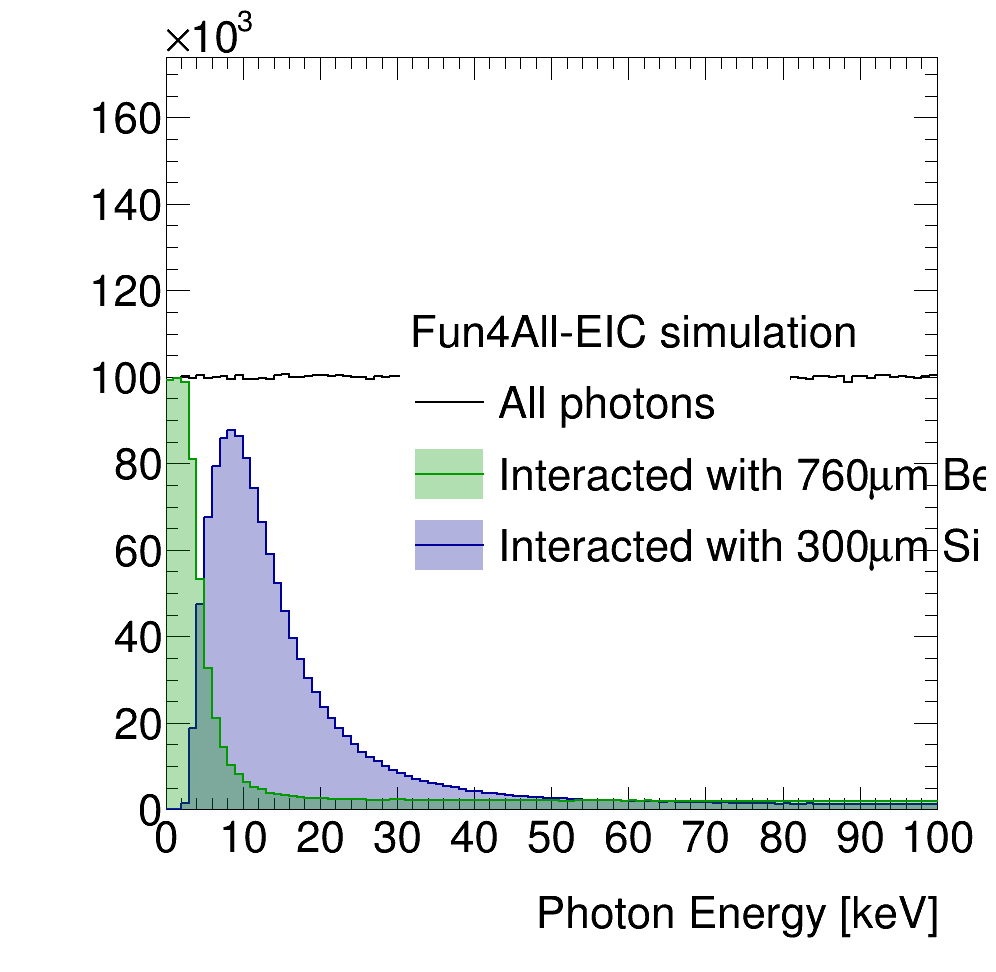

In [25]:
c1 = ROOT.TCanvas( 'PhotonConversion', 'PhotonConversion', 1000, 1000)
c1.Divide(1, 1);
idx = 1;

p = c1.cd(idx);
idx = idx + 1;
c1.Update();
# p.SetLogy();


hPhotonBe.SetLineColor(ROOT.kGreen+2)
hPhotonBe.SetFillColorAlpha(ROOT.kGreen+2,.3)
hPhotonSilicon.SetLineColor(ROOT.kBlue+2)
hPhotonSilicon.SetFillColorAlpha(ROOT.kBlue+2,.3)

# hAllPhoton.GetYaxis().SetRangeUser(0, hAllPhoton.GetMaximum()*1.5);

hAllPhoton.Draw();
hPhotonSilicon.Draw("same");
hPhotonBe.Draw("same");

ROOT.T
    
leg = ROOT.TLegend(.1, .6, .8, .9,   "Fun4All-EIC simulation");
leg.AddEntry(hAllPhoton, "All photons", "lf");
leg.AddEntry(hPhotonBe, "Interacted with 760#mum Be", "lf");
leg.AddEntry(hPhotonSilicon, "Interacted with 300#mum Si", "lf");
leg.Draw();

c1.Draw()

ROOT.SaveCanvas(c1,'PhotonConversion', True);

In [16]:
ROOT.kBlue

600